## Tutorial of scLT-kit on TraCe-seq dataset

### Load dataset and parameters

#### Download link: [TraCe-seq-tumor](https://cloud.tsinghua.edu.cn/f/dae5b3ff8bd04177bd5f/?dl=1)

In [1]:
from scLTkit.scLTStatistics import LTStatistics
from scLTkit.scLTAnalyses import LTAnalyses

In [2]:
import os
import scanpy as sc
dataPath = "D:/Lineage-data/NBT21-TraceSeq/NBT21-TraCeseq-example/"
savePath = "D:/Lineage-data/NBT21-TraceSeq/scLTkit-res/"
if not os.path.exists(savePath):
    os.makedirs(savePath)
datasetName = "NBT21-TraceSeq"
sampleName = "CellLines"
lineage_identity = "gfpbc"
data_0 = sc.read(dataPath + 'D0_scobj.h5ad')
data_4 = sc.read(dataPath + 'D4_erlo_scobj.h5ad')

### Data snippets
#### Take `TraCe-seq` as an example, the original lineage information are stored in the column `gfpbc` of data.obs.
#### The lineage-info are provided by the reference [TraCe-seq-oridata](https://www.ebi.ac.uk/biostudies/arrayexpress/studies/E-MTAB-10698).

In [3]:
data_0, data_4

(AnnData object with n_obs × n_vars = 20675 × 4212
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell', 'sample', 'barcode', 'reads_total', 'mean_quality', 'reads_mapped', 'reads_analyzed', 'reads_top_gene', 'umis_total', 'umis_top_gene', 'umis_mitochondrial', 'genes_detected', 'fraction_reads_mapped', 'fraction_reads_analyzed', 'fraction_reads_top_gene', 'fraction_umis_mitochondrial', 'fraction_umis_top_gene', 'min_umis', 'detected', 'max_mt', 'passed', 'sizefactor', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'run', 'G1S1', 'S2', 'G2M3', 'M4', 'MG15', 'G06', 'cc.expanded', 'gfpbc', 'GFP_class', 'PC_1', 'PC_2', 'UMAP_1', 'UMAP_2', 'TSNE_1', 'TSNE_2', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'n_cells', 'm

In [4]:
data_0.obs.head(5)

,orig.ident,nCount_RNA,nFeature_RNA,cell,sample,barcode,reads_total,mean_quality,reads_mapped,reads_analyzed,...,PC_2,UMAP_1,UMAP_2,TSNE_1,TSNE_2,n_genes,n_genes_by_counts,total_counts,total_counts_mt,pct_counts_mt
CELL5670993,NGS2986_PC9RO,43350,8384,CELL5670993,SAMb6ba60b525,CCACACTCAATACCTG,115934,36,84066,47767,...,NaN,NaN,NaN,NaN,NaN,8382,8382,43348.0,4332.0,9.993541
CELL5671018,NGS2986_PC9RO,42943,8088,CELL5671018,SAMb6ba60b525,GACACGCTCAATGCAC,105319,36,73741,47444,...,NaN,NaN,NaN,NaN,NaN,8088,8088,42943.0,5591.0,13.019584
CELL5671027,NGS2986_PC9RO,41157,7744,CELL5671027,SAMb6ba60b525,TCATTACGTATACCTG,103153,36,71174,45048,...,NaN,NaN,NaN,NaN,NaN,7743,7743,41156.0,5541.0,13.463408
CELL5671028,NGS2986_PC9RO,40868,7798,CELL5671028,SAMb6ba60b525,GGGCTCACAAATAGCA,103139,36,69561,44897,...,NaN,NaN,NaN,NaN,NaN,7797,7797,40867.0,5268.0,12.890596
CELL5671030,NGS2986_PC9RO,42942,7496,CELL5671030,SAMb6ba60b525,CATGCTCAGGTAACTA,102938,36,70509,47192,...,NaN,NaN,NaN,NaN,NaN,7496,7496,42942.0,5693.0,13.257417


### scLTStatistics

------0. Preparing Basic information------
------End of prepareBasicInfo------
------1. Start of getBarcodingFractions------
------Pre time point------
Number of cells in the former time point:  20675
Number of cells with lineage barcode:  19415
Number of cells with flow-out information:  15580
Barcoding fraction of pre-timepoint: 0.9391
Flow-out density of pre-timepoint: 0.7536
------Pos time point------
Number of cells in the latter time point:  5323
Number of cells with lineage barcode:  5145
Number of cells with flow-in information:  4963
Barcoding fraction of pos-timepoint: 0.9666
Flow-in density of pos-timepoint: 0.9324


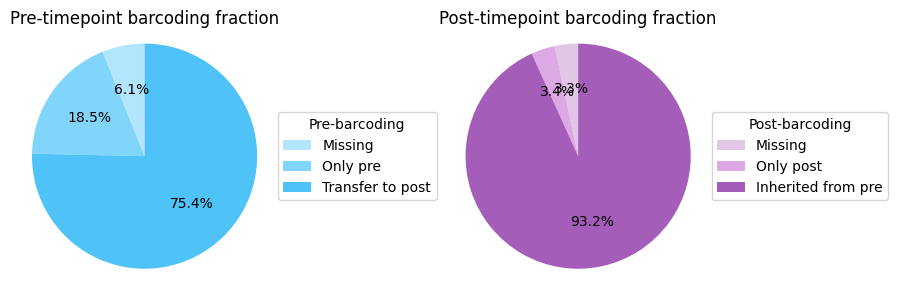

------End of getBarcodingFractions------
------2. Start of getClonalSizes------


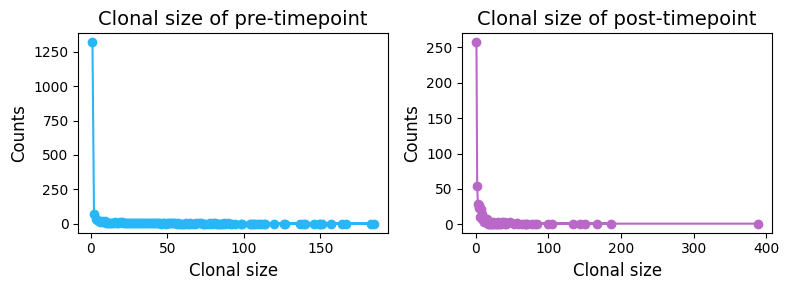

------End of getClonalSizes------


In [5]:
lt_statistics_toolbox = LTStatistics(data_pre=data_0,
                                     data_pos=data_4,
                                     datasetName=datasetName,
                                     sampleName=sampleName,
                                     dataPath=dataPath,
                                     savePath=savePath,
                                     lineage_identity=lineage_identity)
lt_statistics_toolbox.runLTStatistics()

### Snippets of statistical result : data structure of `lt_statistics_toolbox`
#### All the generated figures are saved in the `savePath` defined above.
#### The original data, parameters, calculated metrics, and figures are all stored in the toolbox. Below are three examples:

In [6]:
lt_statistics_toolbox.data_pre, lt_statistics_toolbox.data_pos # Original data

(AnnData object with n_obs × n_vars = 20675 × 4212
     obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'cell', 'sample', 'barcode', 'reads_total', 'mean_quality', 'reads_mapped', 'reads_analyzed', 'reads_top_gene', 'umis_total', 'umis_top_gene', 'umis_mitochondrial', 'genes_detected', 'fraction_reads_mapped', 'fraction_reads_analyzed', 'fraction_reads_top_gene', 'fraction_umis_mitochondrial', 'fraction_umis_top_gene', 'min_umis', 'detected', 'max_mt', 'passed', 'sizefactor', 'S.Score', 'G2M.Score', 'Phase', 'RNA_snn_res.0.1', 'RNA_snn_res.0.2', 'RNA_snn_res.0.3', 'RNA_snn_res.0.4', 'RNA_snn_res.0.5', 'RNA_snn_res.0.6', 'RNA_snn_res.0.7', 'RNA_snn_res.0.8', 'RNA_snn_res.0.9', 'RNA_snn_res.1', 'seurat_clusters', 'run', 'G1S1', 'S2', 'G2M3', 'M4', 'MG15', 'G06', 'cc.expanded', 'gfpbc', 'GFP_class', 'PC_1', 'PC_2', 'UMAP_1', 'UMAP_2', 'TSNE_1', 'TSNE_2', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt'
     var: 'gene_ids', 'feature_types', 'n_cells', 'm

In [8]:
lt_statistics_toolbox.flow_in_den # Refer to "Inherited from pre" in the above pie-plot

0.9323689648694345

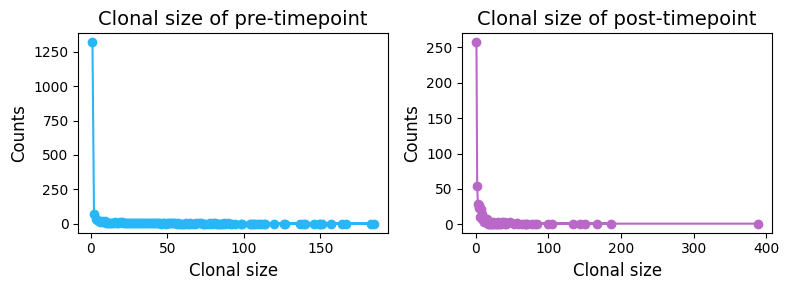

In [9]:
lt_statistics_toolbox.fig_getClonalSizes # Generated figure for clonal size distribution

### scLTAnalyses

------0. Preparing Basic information------
------End of prepareBasicInfo------
------1. Start of runClonalHeterogeneity------
------Mode: cross time-point------


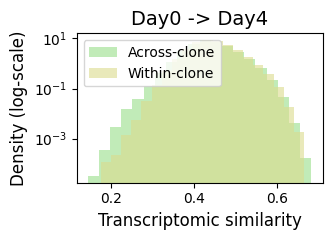

------End of Mode: cross time-point------
------Mode: pre time-point------


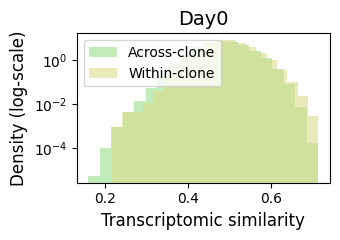

------End of Mode: pre time-point------
------Mode: pos time-point------


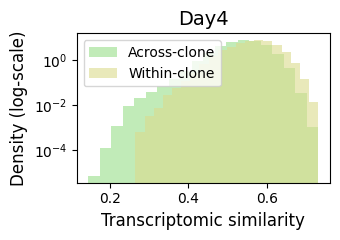

------End of Mode: pos time-point------
------End of runClonalHeterogeneity------
------2. Start of runCellDynamics------
## Identify cell clusters and cell states


E:\Lineage\Code\scLTkit\scLTkit\utils.py:25: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(scd.data_pre, key_added='cluster', resolution=scd.cls_resolutions[0])


| - N_cells: [20675, 5323]
| - N_clusters: [5 5]
| - Saving figure: D:/Lineage-data/NBT21-TraceSeq/scLTkit-res/NBT21-TraceSeq_CellLines-Day0_Day4_Cell-PairUMAP.png


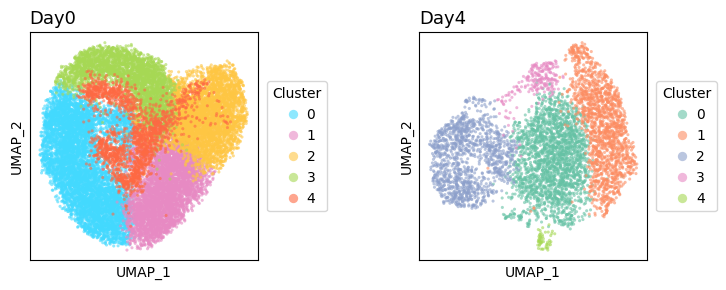

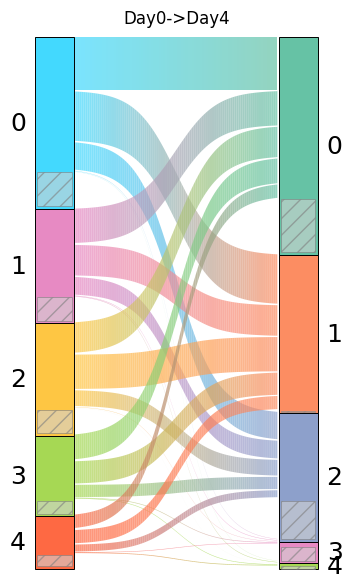

------End of runCellDynamics------
------3. Start of runCellFateDiversity------


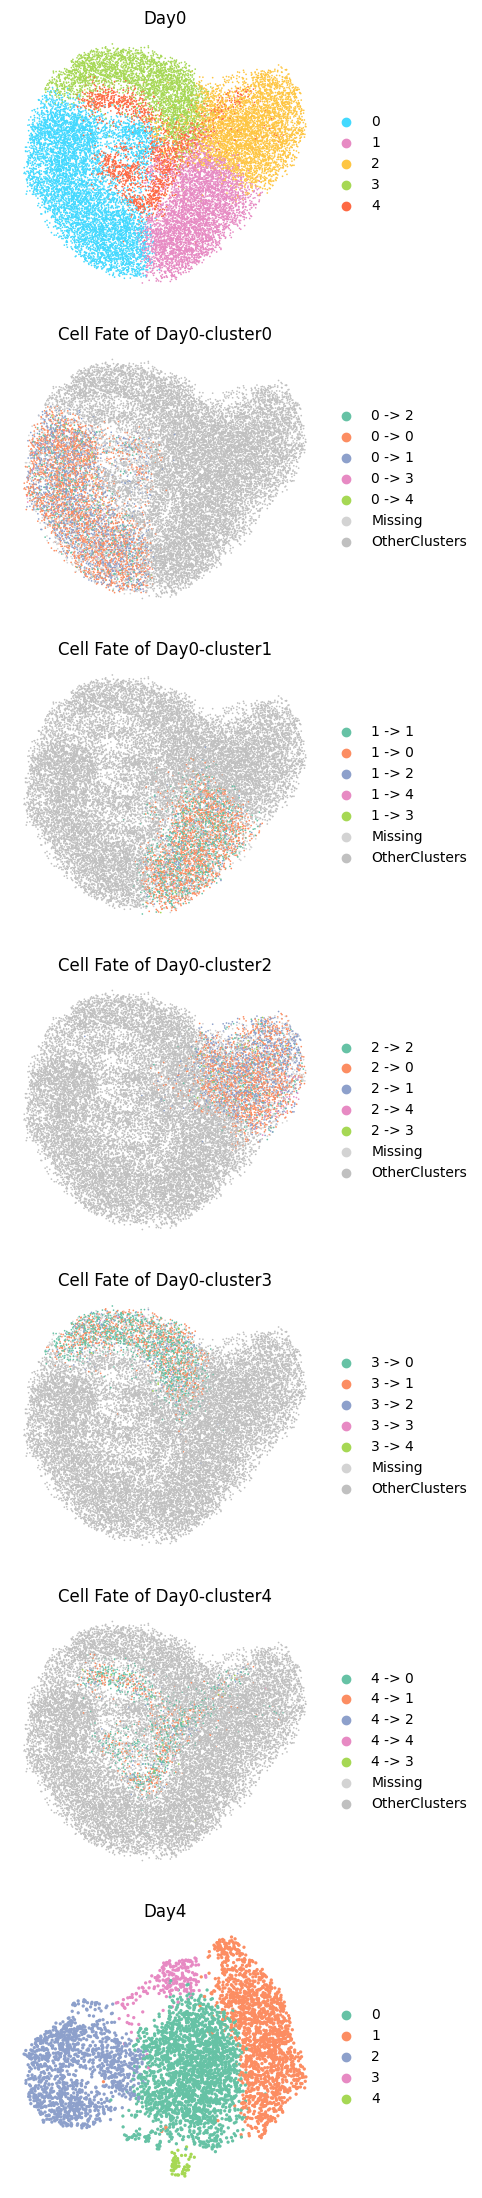

E:\Lineage\Code\scLTkit\scLTkit\utils.py:511: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  same_label_count = sum(1 for j in neighbors if labels[j] == labels[i])
E:\Lineage\Code\scLTkit\scLTkit\utils.py:514: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  label_counts = Counter(labels[j] for j in neighbors)


Neighboring cell fate label consistency (NFC): 0.4212
Neighboring cell fate similarity (NFS): 0.4846
Cell fate randomness (CFR): 0.6800
Neighboring cell fate label randomness (NFR) : 0.7222
------End of runCellFateDiversity------
------4. Start of runSubClusterDiff------
Mode of runSubClusterDiff: 1 v.s. Rest
       Gene Cluster  Fate     scores  logfoldchanges         pvals  \
0   AKR1B10       0  0->2  11.638270        0.128912  2.633011e-31   
1   CEACAM6       0  0->2   8.103338        0.087004  5.347131e-16   
2    AKR1C1       0  0->2   6.775431        0.317960  1.240361e-11   
3     PTGES       0  0->2   6.321260        0.147945  2.594391e-10   
4     CALB1       0  0->2   6.298614        0.174856  3.003185e-10   
..      ...     ...   ...        ...             ...           ...   
54    HSPE1       3  3->0   3.974209        0.057143  7.061358e-05   
55    ALDOA       3  3->0   3.947488        0.018310  7.897562e-05   
0    IGFBP6       4  4->0   5.035455        0.256071  4.767

In [10]:
lt_analyses_toolbox = LTAnalyses(data_pre=data_0,
                                 data_pos=data_4,
                                 datasetName=datasetName,
                                 sampleName=sampleName,
                                 dataPath=dataPath,
                                 savePath=savePath,
                                 lineage_identity=lineage_identity,
                                 pre_name="Day0",
                                 pos_name="Day4",
                                 sel_cluster_name="cluster", # "cluster" as default
                                 cls_resolutions=[0.30, 0.20])
lt_analyses_toolbox.runLTAnalyses()

### Snippets of analysis result: data structure of `lt_analyses_toolbox`
#### All the generated figures are saved in the `savePath` defined above.
#### The original data, parameters, calculated metrics, and figures are all stored in the toolbox. Below are four examples:

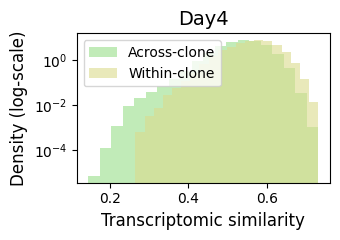

In [17]:
lt_analyses_toolbox.fig_runClonalHeterogeneity[2] # Clonal heterogeneity comparation (index=0,1,2)

#### High fate randomness in TraCe-seq dataset

In [16]:
lt_analyses_toolbox.diversity_metric # Cell fate diversity metrics, the same as the output above (neighboring cell fate label consistency, neighboring cell fate similarity, cell fate randomness, neighboring cell fate label randomness)

[0.42124518613607187,
 0.722155216006719,
 0.6800141938215185,
 0.4846322076487889]

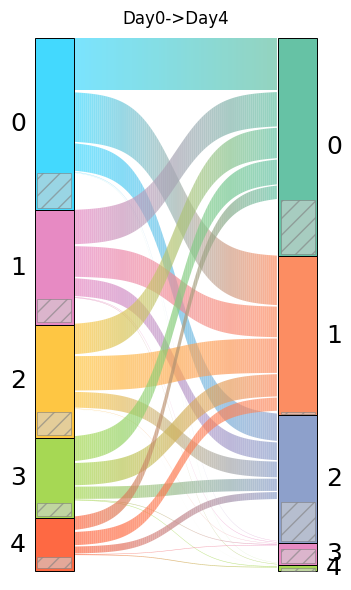

In [13]:
lt_analyses_toolbox.fig_runCellDynamics # Generated Sankey plot for flow info visualization

In [14]:
lt_analyses_toolbox.all_de_df # Diff-expr genes

,Gene,Cluster,Fate,scores,logfoldchanges,pvals,pvals_adj
0,AKR1B10,0,0->2,11.638270,0.128912,2.633011e-31,9.593375e-27
1,CEACAM6,0,0->2,8.103338,0.087004,5.347131e-16,6.494090e-12
2,AKR1C1,0,0->2,6.775431,0.317960,1.240361e-11,9.038509e-08
3,PTGES,0,0->2,6.321260,0.147945,2.594391e-10,1.510640e-06
4,CALB1,0,0->2,6.298614,0.174856,3.003185e-10,1.510640e-06
...,...,...,...,...,...,...,...
54,HSPE1,3,3->0,3.974209,0.057143,7.061358e-05,4.513694e-02
55,ALDOA,3,3->0,3.947488,0.018310,7.897562e-05,4.961167e-02
0,IGFBP6,4,4->0,5.035455,0.256071,4.767155e-07,1.736913e-02
1,AKR1B10,4,4->0,4.879819,0.186727,1.061834e-06,1.934396e-02
